<figure>
  <IMG SRC="http://www.intraperso.univ-nantes.fr/uas/intraperso/LOGO/logo%20un2012blanc_larg40.png" WIDTH=250 ALIGN="right">
</figure>

# Distanciel X1MF020 : Théorie des Probabilités avancée
*P. Carmona*

Pour avancer dans le notebook et exécuter les cellules il faut taper Shift+Enter ou utiliser la barre d'outils ci-dessus et choisir Cell, Run Cell and select Below

## Consignes

Vous répondrez aux questions qui apparaissent en $\color{red} {rouge}$ en modifiant ce notebook. En insérant des cellules de type Markdown pour le texte et des cellules de type Code pour le code. Normalement vous devriez pouvoir vous contenter des cellules prévues en dessous de chaque question : certaines en markdown pour le texte et d'autres en Code pour les codes. 

Ensuite vous sauvez ce notebook sous le nom Prenom_Nom_tpmasterproba.ipynb et vous le déposez sur Madoc.

### Algorithme d'acceptation rejet
Relisez le chapître du cours en distanciel  sur l'algorithme.

$\color{red}{\text{Montrer que l'on peut simuler des variables aléatoires qui
    suivent la loi gaussienne standard par la méthode}}$
    $\color{red}{\text{d'acceptation
    rejet en prenant la loi de Cauchy comme loi instrumentale.}}$
    



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy.random as rnd
import scipy
from scipy import stats
import statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

Le code suivant génère un échantillon de 100 variables aléatoires de Cauchy standard

In [2]:
Y_100 = rnd.standard_cauchy(100)
#Y_100

Le code suivant génère un échantillon de 100 variables aléatoires de loi uniforme standard.

In [3]:
U_100 = rnd.uniform(0,1,100)
#U_100

$\color{red}{\text{Implémenter l'algorithme d'acceptation rejet en créant une fonction 
}}$ $\color{green}{\text{AR}}$ $\color{red}{\text{qui a pour paramètre}}$  $\color{\red} {n\in \mathbb{N}^*}$ $\color{red}{\text{et qui retourne un}}$ $\color{red} n$  $\color{red}{\text{échantillon de variables aléatoires suivant une loi Normale standard.}}$$\color{red}{\text{ATTENTION, il
    faut utiliser une boucle while.}}$
    


1.520346900382118

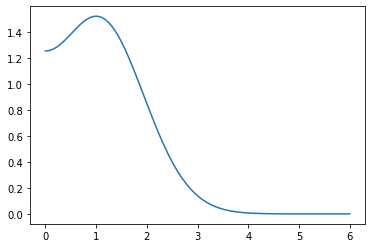

In [4]:
X = np.linspace(0.0,6.0,num=100000)
plt.plot(X, stats.norm.pdf(X)/stats.cauchy.pdf(X))
M = np.max(stats.norm.pdf(X)/stats.cauchy.pdf(X))
M

$M = Sup_{x\in \mathbb{R}} \frac{f(x)}{g(x)} = 1,52 $ 

In [5]:
def min_i(u,y):
    i = 0
    while(u[i]>(stats.norm.pdf(y[i])/(stats.cauchy.pdf(y[i])*M))):
        i = i+1
    T = i
    Yt = y[T]
    return(T)

min_i(U_100,Y_100)

0

In [6]:
def AR(n):
    Yt = []
    T = []
    for j in range(n):
        Y = rnd.standard_cauchy(n)
        U = rnd.uniform(0,1,n)
        t = min_i(U,Y)
        T += [t]
        Yt += [Y[t]]
    return (T,Yt)
A = AR(100)
print(max(A[0]),max(A[1]))

4 2.6025656714658805


$\color{red}{\text{Valider cet algorithme à
    l'aide des critères suivants:}}$
- $\color{red}{\text{comparaison de l'histogramme de l'échantillon avec la densité de la loi cible.}}$ 
- $\color{red}{\text{comparaison de la moyenne (resp. variance) de la  loi cible et de la moyenne (resp. variance) empirique}}$$\color{red}{\text{  de l'échantillon simulé.}}$
- $\color{red}{\text{Retrouver par la simulation le taux d'acceptation et vérifier que le nombre de variables simulées suivant}}$
$\color{red}{\text{la loi instrumentale suit bien une loi géométrique.}}$

L'histogramme de l'échantillon et la densité de la loi cible concordent sur le graphe suivant :

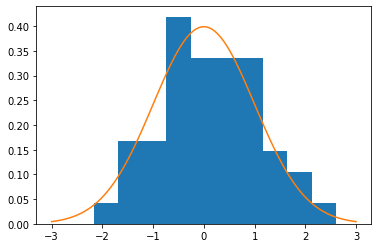

In [7]:
plt.hist(A[1], bins=10,density=True)
X = np.linspace(-3.0,3.0,num=100)
plt.plot(X,stats.norm.pdf(X))

In [8]:
moy_loi = stats.norm.mean(loc=0,scale=1)
print("La moyenne de la loi cible est : ", moy_loi)

moy_ech = np.mean(A[1])
print("La moyenne empirique de l'échantillon simulé est : ",moy_ech)

La moyenne de la loi cible est :  0.0
La moyenne empirique de l'échantillon simulé est :  0.1258737131570546


In [9]:
var_loi = stats.norm.var(loc=0,scale=1)
print("La variance de la loi cible est : ", var_loi)

var_ech = np.var(A[1])
print("La variance empirique de l'échantillon simulé est : ", var_ech)

La variance de la loi cible est :  1.0
La variance empirique de l'échantillon simulé est :  0.9729499204220567


On remarque ci-dessus que les moyennes et les variances de la loi cible et de l'échantillon simulé sont proches.

$\color{red}{\text{Retrouver le taux d'acceptation et montrer que le nombre de variables instrumentales simulées suit}}$ $\color{red}{\text{une loi géométrique.}}$

Le taux d'acceptation $\frac{1}{M}$ vaut 0,66.

In [10]:
print(1/M)

0.657744623775445


T = min {$i \ge 1$ : $U_{i} \le \frac{f(Y_{i})}{M g(Y_{i})}$} suit bien une loi géométrique de paramètre $\frac{1}{M}$ comme on peut l'observer sur le graphe suivant :

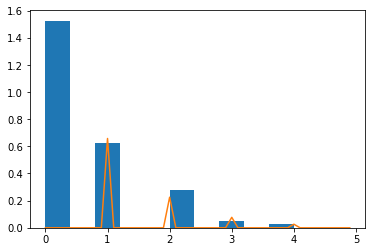

In [11]:
plt.hist(A[0], bins=10,density=True)
X = np.arange(0.0,5.0,0.1)
plt.plot(X,stats.geom.pmf(X, (1/M), loc=0))

Ainsi, on peut simuler des variables aléatoires qui suivent la loi gaussienne standard par la méthode d'acceptation rejet en prenant la loi de Cauchy comme loi instrumentale.

$\color{red}{\text{Montrer que l'on peut simuler la loi du demi-cercle, i.e. la
    loi de densité}}$ $\color{red}{f(x)=\frac{2}{\pi}\sqrt{1-x^2} 1_{(-1\le x\le 1)}}$
  $\color{red}{\text{  en prenant la loi uniforme sur}}$ $\color{red}{[-1,1]}$ $\color{red}{\text{comme loi
    instrumentale.}}$



$\color{red}{\text{Implémenter et valider l'algorithme en suivant les étapes
    proposées à la question précédente.}}$

$M = Sup_{x\in \mathbb{R}} \frac{f(x)}{g(x)} = 1,27 $ 

C:\Users\maeva\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


1.2732395447351628

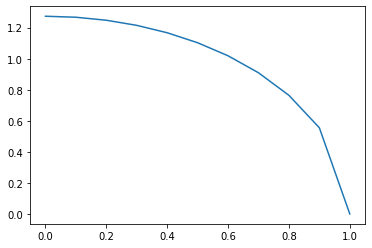

In [12]:
#Echantillon de 100 variables aléatoires de loi uniforme sur [-1,1]
Y_100_cercle = rnd.uniform(-1,1,1000)

#Calcul de M
X_cercle = np.linspace(-1.0,1.0,num=10000)
plt.plot(X, stats.semicircular.pdf(X)/stats.uniform.pdf(X, loc=-1, scale=2))
M_cercle = np.max(stats.semicircular.pdf(0)/stats.uniform.pdf(0, loc=-1, scale=2))
M_cercle

In [13]:
def min_i_cercle(u,y):
    i = 0
    while(u[i]>(stats.semicircular.pdf(y[i])/(stats.uniform.pdf(y[i], loc=-1, scale=2)*M))):
        i = i+1
    T = i
    Yt = y[T]
    return(T)

print(min_i_cercle(U_100,Y_100_cercle))

def AR_cercle(n):
    Yt = []
    T = []
    for j in range(n):
        Y = rnd.uniform(-1.0,1.0,n)
        U = rnd.uniform(0,1,n)
        t = min_i_cercle(U,Y)
        T += [t]
        Yt += [Y[t]]
    return (T,Yt)
A_cercle = AR_cercle(100)
print(max(A_cercle[0]),max(A_cercle[1]))

0
4 0.9340556136635279


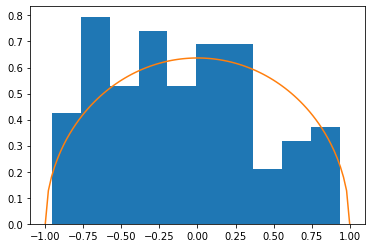

In [14]:
plt.hist(A_cercle[1], bins=10,density=True)
X = np.linspace(-1.0,1.0,num=100)
plt.plot(X,stats.semicircular.pdf(X))

In [15]:
moy_loi = stats.semicircular.mean()
print("La moyenne de la loi cible est : ", moy_loi)

moy_ech = np.mean(A_cercle[1])
print("La moyenne empirique de l'échantillon simulé est : ",moy_ech)

var_loi = stats.semicircular.var()
print("La variance de la loi cible est : ", var_loi)

var_ech = np.var(A_cercle[1])
print("La variance empirique de l'échantillon simulé est : ", var_ech)

La moyenne de la loi cible est :  0.0
La moyenne empirique de l'échantillon simulé est :  -0.10728006189539854
La variance de la loi cible est :  0.25
La variance empirique de l'échantillon simulé est :  0.2606144371565519


On remarque ci-dessus que les moyennes et les variances de la loi cible et de l'échantillon simulé sont proches.

Le taux d'acceptation $\frac{1}{M}$ vaut 0,79.

In [16]:
print(1/M_cercle)

0.7853981633974483


T = min {$i \ge 1$ : $U_{i} \le \frac{f(Y_{i})}{M g(Y_{i})}$} suit bien une loi géométrique de paramètre $\frac{1}{M}$ comme on peut l'observer sur le graphe suivant :

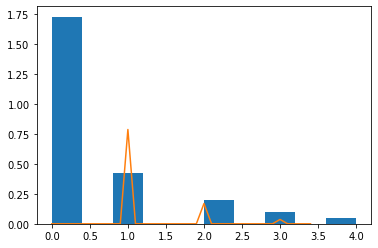

In [17]:
plt.hist(A_cercle[0], bins=10, density=True)
X = np.arange(0.0,3.5,0.1)
plt.plot(X,stats.geom.pmf(X, (1/M_cercle)))

Ainsi, on peut simuler la loi du demi-cercle en prenant la loi uniforme sur [-1,1] comme loi instrumentale.